# Script for taking measurements

## Imports

In [1]:
import pocketvna
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
from stlab.devices.Vaunix_Phase import Vaunix_Phase
import time

Could not load "PocketVnaApi_x64" by systempath. Trying another one "C:\Users\Jacco\Documents\GitHub\bep-jacco-van-leenen\Code\PocketVnaApi_x64.dll"


## Setting Up the VNA

In [2]:
# Connecting the VNA
driver = pocketvna.Driver()

print('Driver is created: {} devices connected..'.format(driver.count()))
for i in range(0, driver.count()):
    print('Device {}'.format(i))
    print('\t {}'.format(driver.info_at(i)))

if not driver.connect_to(0):
    print('Failed to connect')

Driver is created: 1 devices connected..
Device 0
	 {'index': 0, 'path:': b'\\\\?\\hid#vid_03eb&pid_2402#7&1fc8f206&0&0000#{4d1e55b2-f16f-11cf-88cb-001111000030}', 'version': 512, 'SN': '12xxxEF', 'product': 'PocketVNA', 'vendor': '', 'read': True, 'write': True}


## Setting Up the Phase Shifters

In [3]:
# Connecting the phase shifters
ph1 = Vaunix_Phase(23869)
#ph2 = Vaunix_phase(19164)

# Setting the frquency to the minimum
ph1.SetFrequency(4000000000)
#ph2.SetFrequency(4000000000)

# Setting the phase to the minimum
ph1.SetPhase(0)
#ph2.SetPhase(0)

# Checking if the phases and the frequencies are set correctly
print("Phase of Phase Shifter 1: {}\nFrequency of Phase Shifter 1: {}".format(ph1.GetPhase(), ph1.GetFrequency()))
#print("Phase of Phase Shifter 2: {}\nFrequency of Phase Shifter 2: {}".format(ph2.GetPhase(), ph2.GetFrequency()))


status: 0
Phase of Phase Shifter 1: 0.0
Frequency of Phase Shifter 1: 4000000000.0


## Basics and Standard Variables

In [4]:
# Some of the basic variables the program needs

# The degrees of the phase shifter
#degrees = [0, 5, 10, 15, 20, 25]

# The labels that suit the degrees of the phase shifter. Will be used for the plots
#labels = ["0 degrees", "5 degrees", "10 degrees", "15 degrees", "20 degrees", "25 degrees"]

# Setting the figure size of the plots
plt.rcParams['figure.figsize'] = (10,6)

# The frequencies over which the measurement will take place
#ranges = [0, 1000, 2000, 3000, 4000, 5000]

## Creating Calibration Folder

In [5]:
# Setting the folder where the calibration data will be stored

# Main folder
calibration_folder_name = "Calibration"

# Checking if the folder exists. If it doesn't it will create the folder
if not os.path.exists(calibration_folder_name):
    os.mkdir(calibration_folder_name)

## Creating Measurements Folder

In [6]:
# Setting the folder where the measurement data will be stored

# Main folder
measurement_folder_name = "Measurements"

# Checking if the folder exists. If it doesn't it will create the folder
if not os.path.exists(measurement_folder_name):
    os.mkdir(measurement_folder_name)

## Calibrating

In [9]:
# Calibrating

# Chopping data into different data files
def data_chopping(s21, name):
    # 1000 steps per 1GHz
    file_name ="trans_{}_0-6GHz_1000_steps.dat".format(name)
    save_name = os.path.join("Calibration", file_name)
    data = np.column_stack((s21.real, s21.imag))
    np.savetxt(save_name, data)
    print("Saved: " + save_name)
    
    for i in range(6):
        # 1GHz range, 1000 steps
        temp_1 = s21[i*1000:(i+1)*1000]
        file_name ="trans_{}_{}-{}GHz_1000_steps.dat".format(name, i, i+1)
        save_name = os.path.join("Calibration", file_name)
        data = np.column_stack((temp_1.real, temp_1.imag))
        np.savetxt(save_name, data)
        print("Saved: " + save_name)
        
        # 500 steps 
        temp_2 = np.array([], dtype=np.complex)
        for j in range(0, len(temp_1), 2):
            temp_2 = np.append(temp_2, temp_1[j])
        file_name ="trans_{}_{}-{}GHz_500_steps.dat".format(name, i, i+1)
        save_name = os.path.join("Calibration", file_name)
        data = np.column_stack((temp_2.real, temp_2.imag))
        np.savetxt(save_name, data)
        print("Saved: " + save_name)
        
        # 250 steps
        temp_2 = np.array([], dtype=np.complex)
        for j in range(0, len(temp_1), 4):
            temp_2 = np.append(temp_2, temp_1[j])
        file_name ="trans_{}_{}-{}GHz_250_steps.dat".format(name, i, i+1)
        save_name = os.path.join("Calibration", file_name)
        data = np.column_stack((temp_2.real, temp_2.imag))
        np.savetxt(save_name, data)
        print("Saved: " + save_name)
        
        # 100 steps
        temp_2 = np.array([], dtype=np.complex)
        for j in range(0, len(temp_1), 10):
            temp_2 = np.append(temp_2, temp_1[j])
        file_name ="trans_{}_{}-{}GHz_100_steps.dat".format(name, i, i+1)
        save_name = os.path.join("Calibration", file_name)
        data = np.column_stack((temp_2.real, temp_2.imag))
        np.savetxt(save_name, data)
        print("Saved: " + save_name)
    
    # 500 steps per 1GHz
    temp_2 = np.array([], dtype=np.complex)
    for j in range(0, len(s21), 2):
        temp_2 = np.append(temp_2, s21[j])
    file_name ="trans_{}_0-6GHz_500_steps.dat".format(name)
    save_name = os.path.join("Calibration", file_name)
    data = np.column_stack((temp_2.real, temp_2.imag))
    np.savetxt(save_name, data)
    print("Saved: " + save_name)

    # 250 steps per 1GHz
    temp_2 = np.array([], dtype=np.complex)
    for j in range(0, len(s21), 4):
        temp_2 = np.append(temp_2, s21[j])
    file_name ="trans_{}_0-6GHz_250_steps.dat".format(name)
    save_name = os.path.join("Calibration", file_name)
    data = np.column_stack((temp_2.real, temp_2.imag))
    np.savetxt(save_name, data)
    print("Saved: " + save_name)

    # 100 steps per 1GHz
    temp_2 = np.array([], dtype=np.complex)
    for j in range(0, len(s21), 10):
        temp_2 = np.append(temp_2, s21[j])
    file_name ="trans_{}_0-6GHz_100_steps.dat".format(name)
    save_name = os.path.join("Calibration", file_name)
    data = np.column_stack((temp_2.real, temp_2.imag))
    np.savetxt(save_name, data)
    print("Saved: " + save_name)

#  ---------------Open and through measurement---------------
# 6000 steps
STEPS = 6_000
# Start at 1_000_000 
START = 1000000
# End at 6_000_000_000
END = 6000000000
# Average amount of measurements per point
AVERAGE = 10

# Frequency array
freq = np.linspace(START, END, STEPS, dtype=np.uint64)

#  ---------------Open Measurement---------------
# Measuring
input("Open Measurement")
s11, s21, s12, s22 = driver.scan(freq, AVERAGE, pocketvna.NetworkParams.S21)

# Chopping the data into multiple pieces
data_chopping(s21, "open")

#  ---------------through Measurement---------------
# Measuring
input("Through Measurement")
s11, s21, s12, s22 = driver.scan(freq, AVERAGE, pocketvna.NetworkParams.S21)

# Chopping the data into multiple pieces
data_chopping(s21, "through")

Open Measurement
Saved: Calibration\trans_open_0-6GHz_6000_steps.dat
Saved: Calibration\trans_open_0-1GHz_1000_steps.dat
Saved: Calibration\trans_open_0-1GHz_500_steps.dat
Saved: Calibration\trans_open_0-1GHz_250_steps.dat
Saved: Calibration\trans_open_0-1GHz_100_steps.dat
Saved: Calibration\trans_open_1-2GHz_1000_steps.dat
Saved: Calibration\trans_open_1-2GHz_500_steps.dat
Saved: Calibration\trans_open_1-2GHz_250_steps.dat
Saved: Calibration\trans_open_1-2GHz_100_steps.dat
Saved: Calibration\trans_open_2-3GHz_1000_steps.dat
Saved: Calibration\trans_open_2-3GHz_500_steps.dat
Saved: Calibration\trans_open_2-3GHz_250_steps.dat
Saved: Calibration\trans_open_2-3GHz_100_steps.dat
Saved: Calibration\trans_open_3-4GHz_1000_steps.dat
Saved: Calibration\trans_open_3-4GHz_500_steps.dat
Saved: Calibration\trans_open_3-4GHz_250_steps.dat
Saved: Calibration\trans_open_3-4GHz_100_steps.dat
Saved: Calibration\trans_open_4-5GHz_1000_steps.dat
Saved: Calibration\trans_open_4-5GHz_500_steps.dat
Saved: C

In [3]:
temp = np.array([], dtype=np.complex)
temp = np.append(temp, 1 + 3j)
temp = np.append(temp, 2 + 4j)
temp = np.append(temp, 3 + 5j)

for i in temp:
    print(i)
    
hello = "hello mf"

beard = "gutetang_{}".format(hello)
print(beard)

(1+3j)
(2+4j)
(3+5j)
gutetang_hello mf


## Measurements (0-6GHz, ... Phase Shift, No Phase Shift Frequency)

In [8]:
def data_chopping(s21, deg, name):
    file_name ="{}_0-6GHz_1000_steps_phase_shift_{}_degrees.dat".format(name, deg)
    save_name = os.path.join("Measurements", file_name)
    data = np.column_stack((s21.real, s21.imag))
    np.savetxt(save_name, data)
    print("Saved: " + save_name)
    
    for i in range(6):
        # 1GHz range, 1000 steps
        temp_1 = s21[i*1000:(i+1)*1000]
        file_name ="{}_{}-{}GHz_1000_steps_phase_shift_{}_degrees.dat".format(name, i, i+1, deg)
        save_name = os.path.join("Measurements", file_name)
        data = np.column_stack((temp_1.real, temp_1.imag))
        np.savetxt(save_name, data)
        print("Saved: " + save_name)
        
        # 500 steps 
        temp_2 = np.array([], dtype=np.complex)
        for j in range(0, len(temp_1), 2):
            temp_2 = np.append(temp_2, temp_1[j])
        file_name ="{}_{}-{}GHz_500_steps_phase_shift_{}_degrees.dat".format(name, i, i+1, deg)
        save_name = os.path.join("Measurements", file_name)
        data = np.column_stack((temp_2.real, temp_2.imag))
        np.savetxt(save_name, data)
        print("Saved: " + save_name)
        
        # 250 steps
        temp_2 = np.array([], dtype=np.complex)
        for j in range(0, len(temp_1), 4):
            temp_2 = np.append(temp_2, temp_1[j])
        file_name ="{}_{}-{}GHz_250_steps_phase_shift_{}_degrees.dat".format(name, i, i+1, deg)
        save_name = os.path.join("Measurements", file_name)
        data = np.column_stack((temp_2.real, temp_2.imag))
        np.savetxt(save_name, data)
        print("Saved: " + save_name)
        
        # 100 steps
        temp_2 = np.array([], dtype=np.complex)
        for j in range(0, len(temp_1), 10):
            temp_2 = np.append(temp_2, temp_1[j])
        file_name ="{}_{}-{}GHz_100_steps_phase_shift_{}_degrees.dat".format(name, i, i+1, deg)
        save_name = os.path.join("Measurements", file_name)
        data = np.column_stack((temp_2.real, temp_2.imag))
        np.savetxt(save_name, data)
        print("Saved: " + save_name)

#  ---------------Measurement Variables---------------
# 6000 steps
steps = 6_000
# Start at 1_000_000 
start = 1000000
# End at 6_000_000_000
end = 6000000000
# Average amount of measurements per point
average = 5

# name to be given to the data
name = "interferometer_1_phase_shifter_5_av"

# Phase shifts to measure
phase_shift = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

# Frequency array
freq = np.linspace(start, end, steps, dtype=np.uint64)

# Empty S21 array
s21 = np.zeros(steps, dtype=np.complex)


#  ---------------Measuring---------------
for deg in phase_shift:
    print("\tAcquiring data for phase shift of {} degrees".format(deg))
    # Setting the Phase of the phase shifter
    ph1.SetPhase(deg)
    # For the response time of the phase shifter
    time.sleep(0.1)
    
    # The Measurement
    s11, s21, s12, s22 = driver.scan(freq, average, pocketvna.NetworkParams.S21)
    
    # Data Chopping
    data_chopping(s21, deg, name)

	Acquiring data for phase shift of 5 degrees
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-6GHz_1000_steps_phase_shift_5_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_1000_steps_phase_shift_5_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_500_steps_phase_shift_5_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_250_steps_phase_shift_5_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_100_steps_phase_shift_5_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_1000_steps_phase_shift_5_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_500_steps_phase_shift_5_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_250_steps_phase_shift_5_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_100_steps_phase_shift_5_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_2-3GH

Saved: Measurements\interferometer_1_phase_shifter_5_av_0-6GHz_1000_steps_phase_shift_25_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_1000_steps_phase_shift_25_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_500_steps_phase_shift_25_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_250_steps_phase_shift_25_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_100_steps_phase_shift_25_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_1000_steps_phase_shift_25_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_500_steps_phase_shift_25_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_250_steps_phase_shift_25_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_100_steps_phase_shift_25_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_2-3GHz_1000_steps_phase_shift_25_degrees.

Saved: Measurements\interferometer_1_phase_shifter_5_av_0-6GHz_1000_steps_phase_shift_45_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_1000_steps_phase_shift_45_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_500_steps_phase_shift_45_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_250_steps_phase_shift_45_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_100_steps_phase_shift_45_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_1000_steps_phase_shift_45_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_500_steps_phase_shift_45_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_250_steps_phase_shift_45_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_100_steps_phase_shift_45_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_2-3GHz_1000_steps_phase_shift_45_degrees.

Saved: Measurements\interferometer_1_phase_shifter_5_av_0-6GHz_1000_steps_phase_shift_65_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_1000_steps_phase_shift_65_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_500_steps_phase_shift_65_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_250_steps_phase_shift_65_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_100_steps_phase_shift_65_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_1000_steps_phase_shift_65_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_500_steps_phase_shift_65_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_250_steps_phase_shift_65_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_100_steps_phase_shift_65_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_2-3GHz_1000_steps_phase_shift_65_degrees.

Saved: Measurements\interferometer_1_phase_shifter_5_av_0-6GHz_1000_steps_phase_shift_85_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_1000_steps_phase_shift_85_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_500_steps_phase_shift_85_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_250_steps_phase_shift_85_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_0-1GHz_100_steps_phase_shift_85_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_1000_steps_phase_shift_85_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_500_steps_phase_shift_85_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_250_steps_phase_shift_85_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_1-2GHz_100_steps_phase_shift_85_degrees.dat
Saved: Measurements\interferometer_1_phase_shifter_5_av_2-3GHz_1000_steps_phase_shift_85_degrees.

## Plotting the measurements

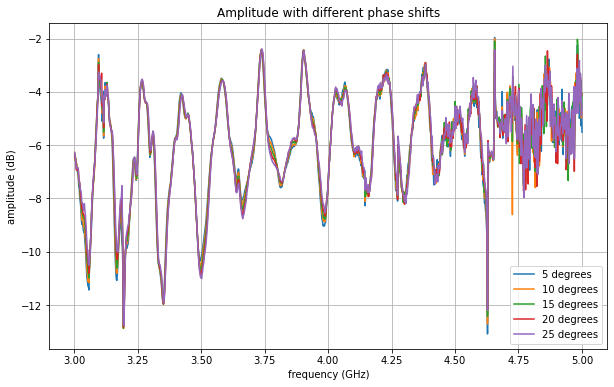

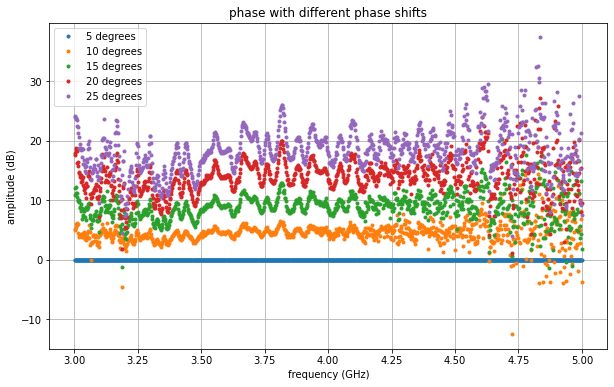

In [11]:
# Plotting the measurements

def opening_files(name, start, end, steps, phase_shift):
    temp = np.array([], dtype=np.complex)
    for i in range(start, end):
        s21 = np.zeros((steps, len(phase_shift)), dtype=np.complex)
        for deg in phase_shift:
            file_name = "{}_{}-{}GHz_{}_steps_phase_shift_{}_degrees.dat".format(name, i, i+1, steps, deg)
            save_name = os.path.join("Measurements", file_name)
            s21_open = np.loadtxt(save_name)
            s21[:, phase_shift.index(deg)] = s21_open[:, 0] + s21_open[:, 1] * 1j
        cal_s21 = calibrating_measurement(s21, i, i+1, steps)
        if temp.size == 0:
            temp = cal_s21
        else:
            temp = np.vstack((temp, cal_s21))
    return temp
    
def calibrating_measurement(s21, start, end, steps):
    file_name = "trans_open_{}-{}GHz_{}_steps.dat".format(start, end, steps)
    save_name = os.path.join("Calibration", file_name)
    trans_open = np.loadtxt(save_name)
    t_open = trans_open[:, 0] + trans_open[:, 1] * 1j

    file_name = "trans_through_{}-{}GHz_{}_steps.dat".format(start, end, steps)
    save_name = os.path.join("Calibration", file_name)
    trans_through = np.loadtxt(save_name)
    t_through = trans_through[:, 0] + trans_through[:, 1] * 1j

    cal_s21 = np.zeros(np.shape(s21), dtype=np.complex128)
    x, y = np.shape(s21)
    for i in range(y):
        cal_s21[:, i] = (s21[:, i] - t_open) / (t_through - t_open)
    return cal_s21

def get_labels(phase_shift):
    labels = []
    for deg in phase_shift:
        labels.append("{} degrees".format(deg))
    return labels

def plot_amplitude(s21, start, end, steps, labels):
    freq = np.linspace(start + 1 / steps, end, steps*(end-start))
    f = np.zeros(np.shape(s21))
    f = f + freq[:, None]
    amp_s21 = np.sqrt(s21.real**2 + s21.imag**2)
    amp_s21 = 20*np.log10(amp_s21)
    plt.figure(20)
    plt.plot(f, amp_s21, "-")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("amplitude (dB)")
    plt.legend(labels)
    plt.grid()
    plt.title("Amplitude with different phase shifts")
    
def plot_phase(s21, start, end, steps, labels):
    freq = np.linspace(start + 1 / steps, end, steps*(end-start))
    f = np.zeros(np.shape(s21))
    f = f + freq[:, None]
    phase = np.arctan2(s21.imag, s21.real)
    phase -= phase[:, 0, None]
    phase = phase * 180/np.pi
    phase[phase< -180] += 360
    phase[phase > 180] -= 360
    plt.figure(10)
    plt.plot(f, phase, ".")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("amplitude (dB)")
    plt.legend(labels)
    plt.grid()
    plt.title("phase with different phase shifts")
    
# Opening the measurement data file
# name = "through_with_phase_shifter"
name = "michelson_interferometer_1_phase_shifter"
start = 3
end = 5
steps = 500
phase_shift = [5, 10, 15, 20, 25]

# ---------------Opening Measurement Files---------------
s21 = opening_files(name, start, end, steps, phase_shift)

# ---------------Calibrating Measurement Files---------------
#s21 = calibrating_measurement(s21, start, end, steps)

# ---------------Plotting Amplitude---------------
# Making labels
labels = get_labels(phase_shift)

plot_amplitude(s21, start, end, steps, labels)

# ---------------Plotting Phase-----------------
plot_phase(s21, start, end, steps, labels)

